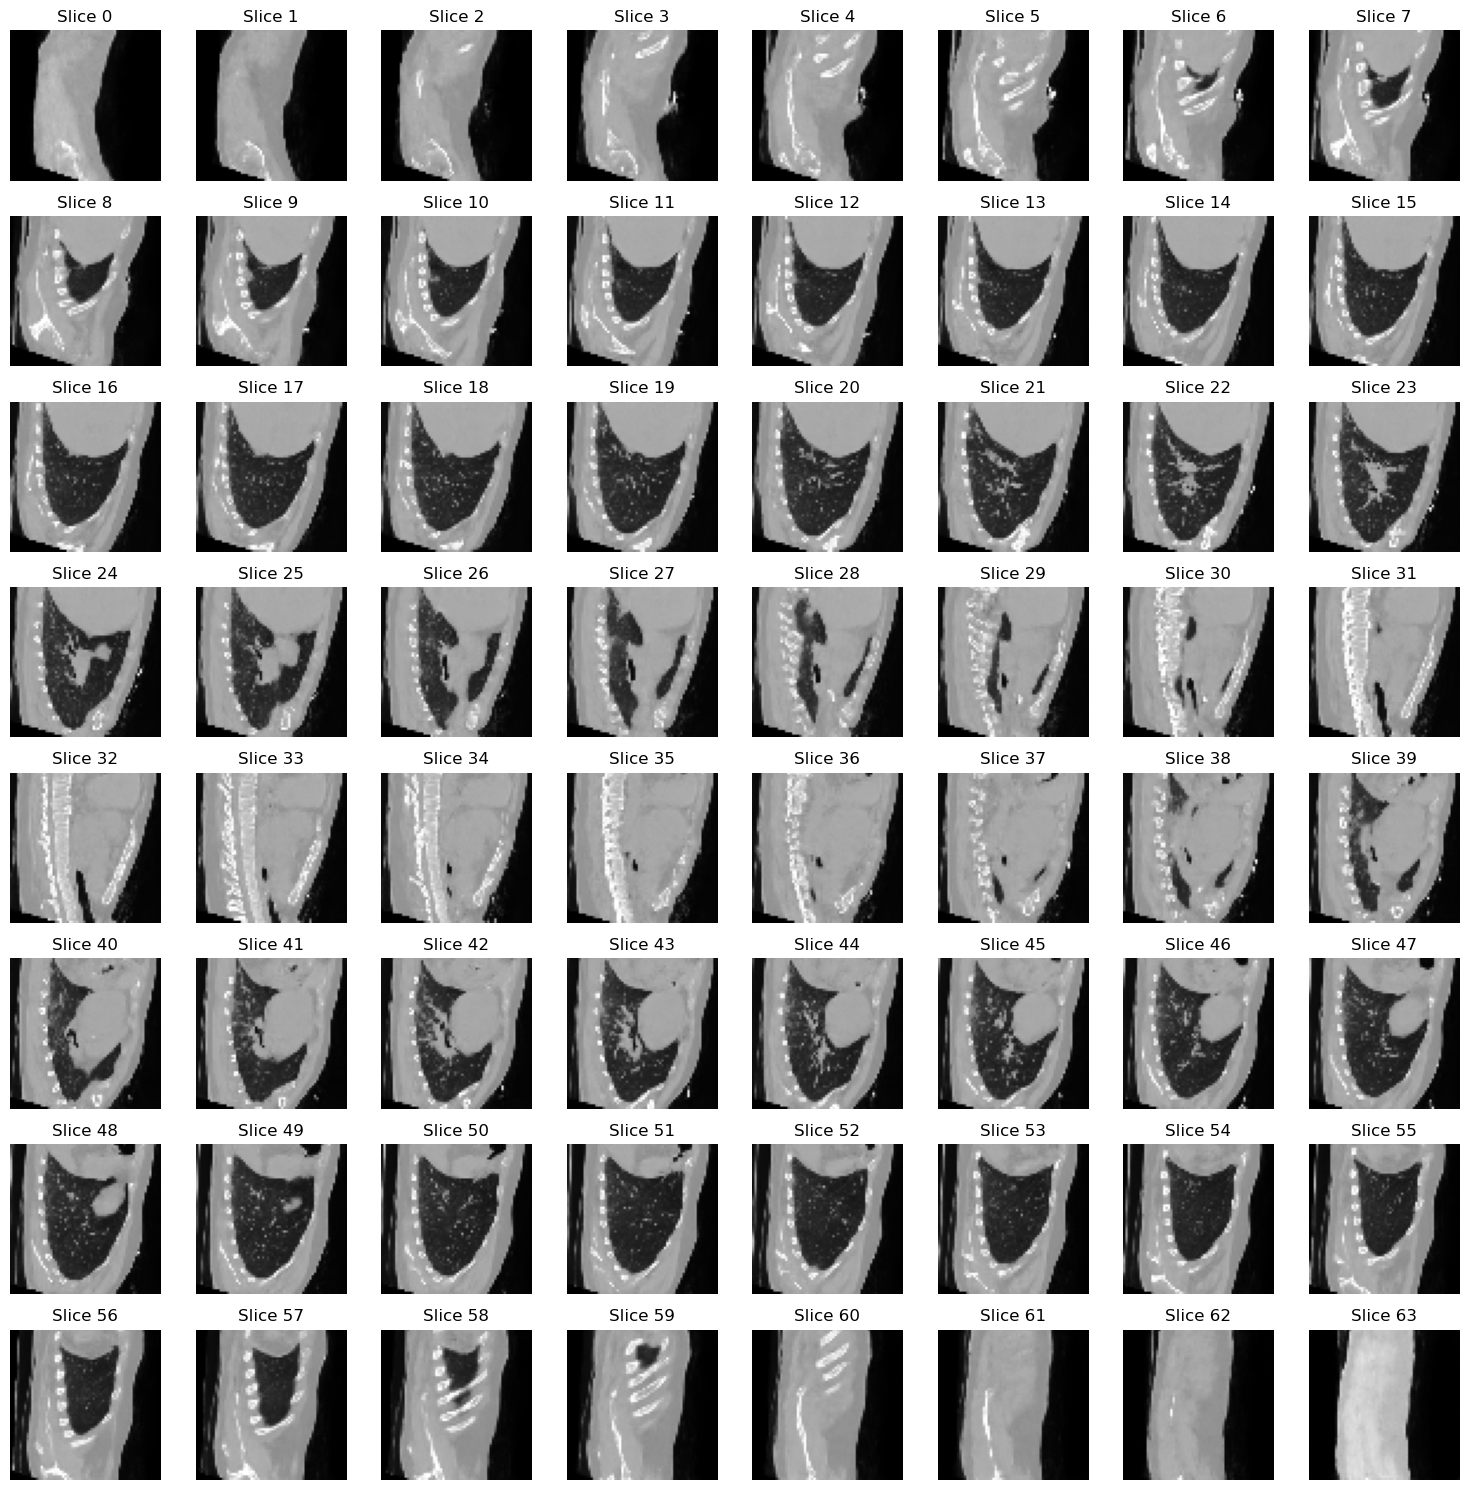

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy')

# first sample and 1stn dimension channel
sample = data[0, 0, :, :, :]  # (64, 64, 64)
n_rows = 8  
n_cols = 8  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()

# grid
for i in range(n_rows * n_cols):
    axes[i].imshow(sample[:, :, i], cmap='gray')  # Display slice i
    axes[i].set_title(f'Slice {i}')
    axes[i].axis('off') 

plt.tight_layout()
plt.show()


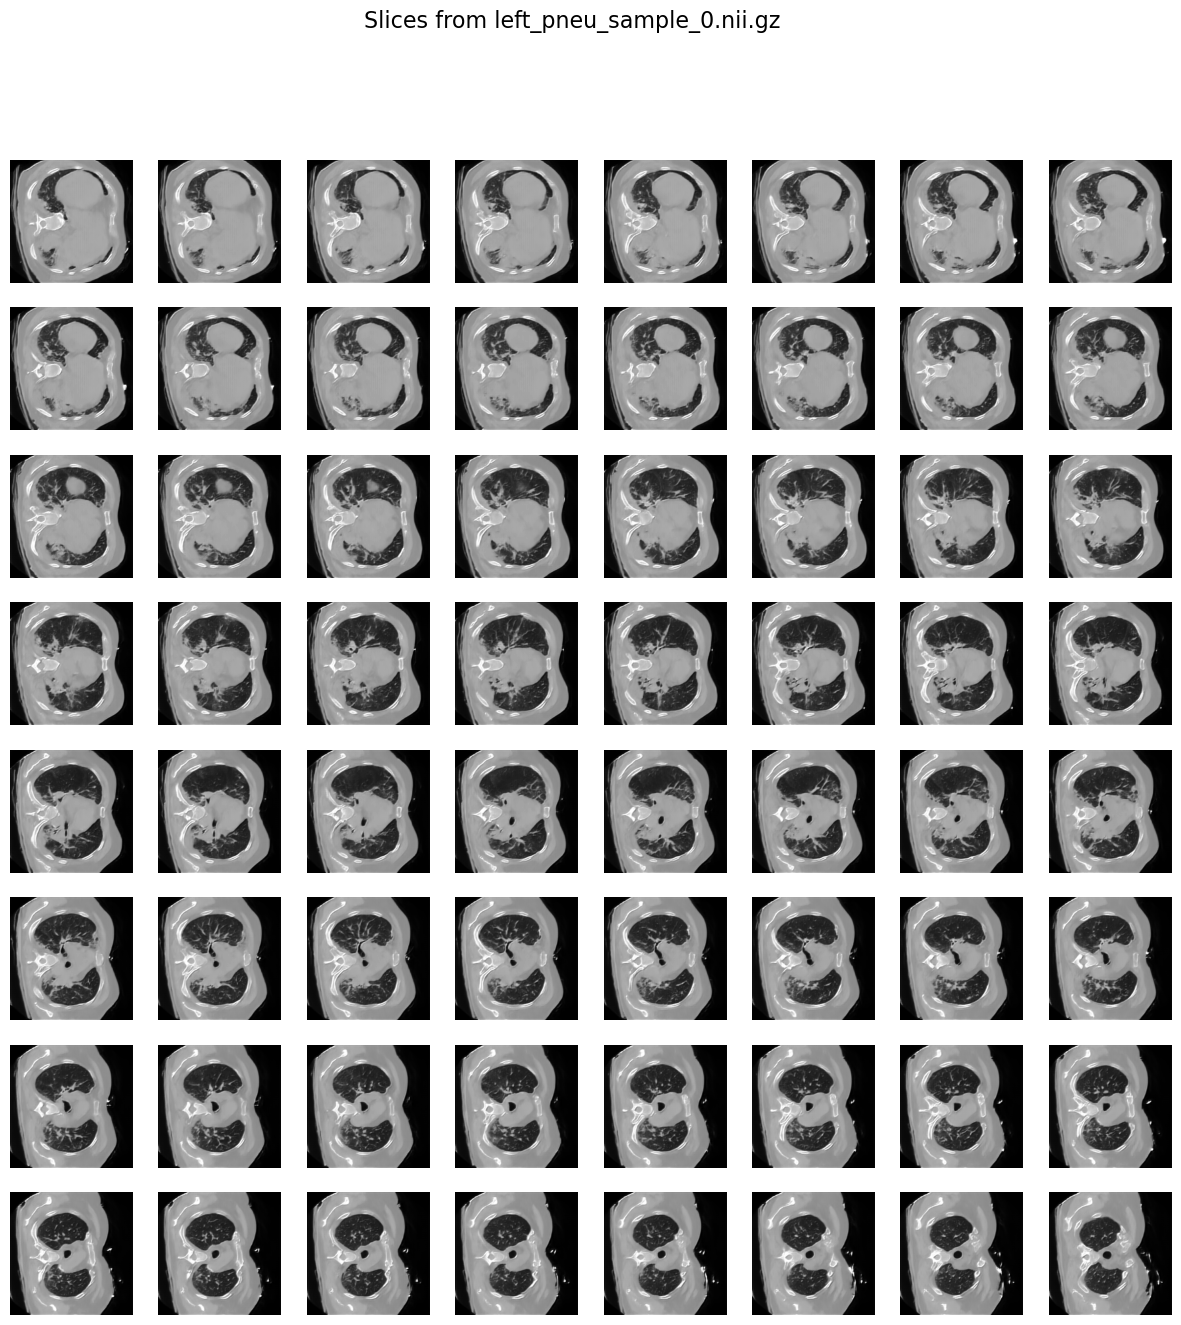

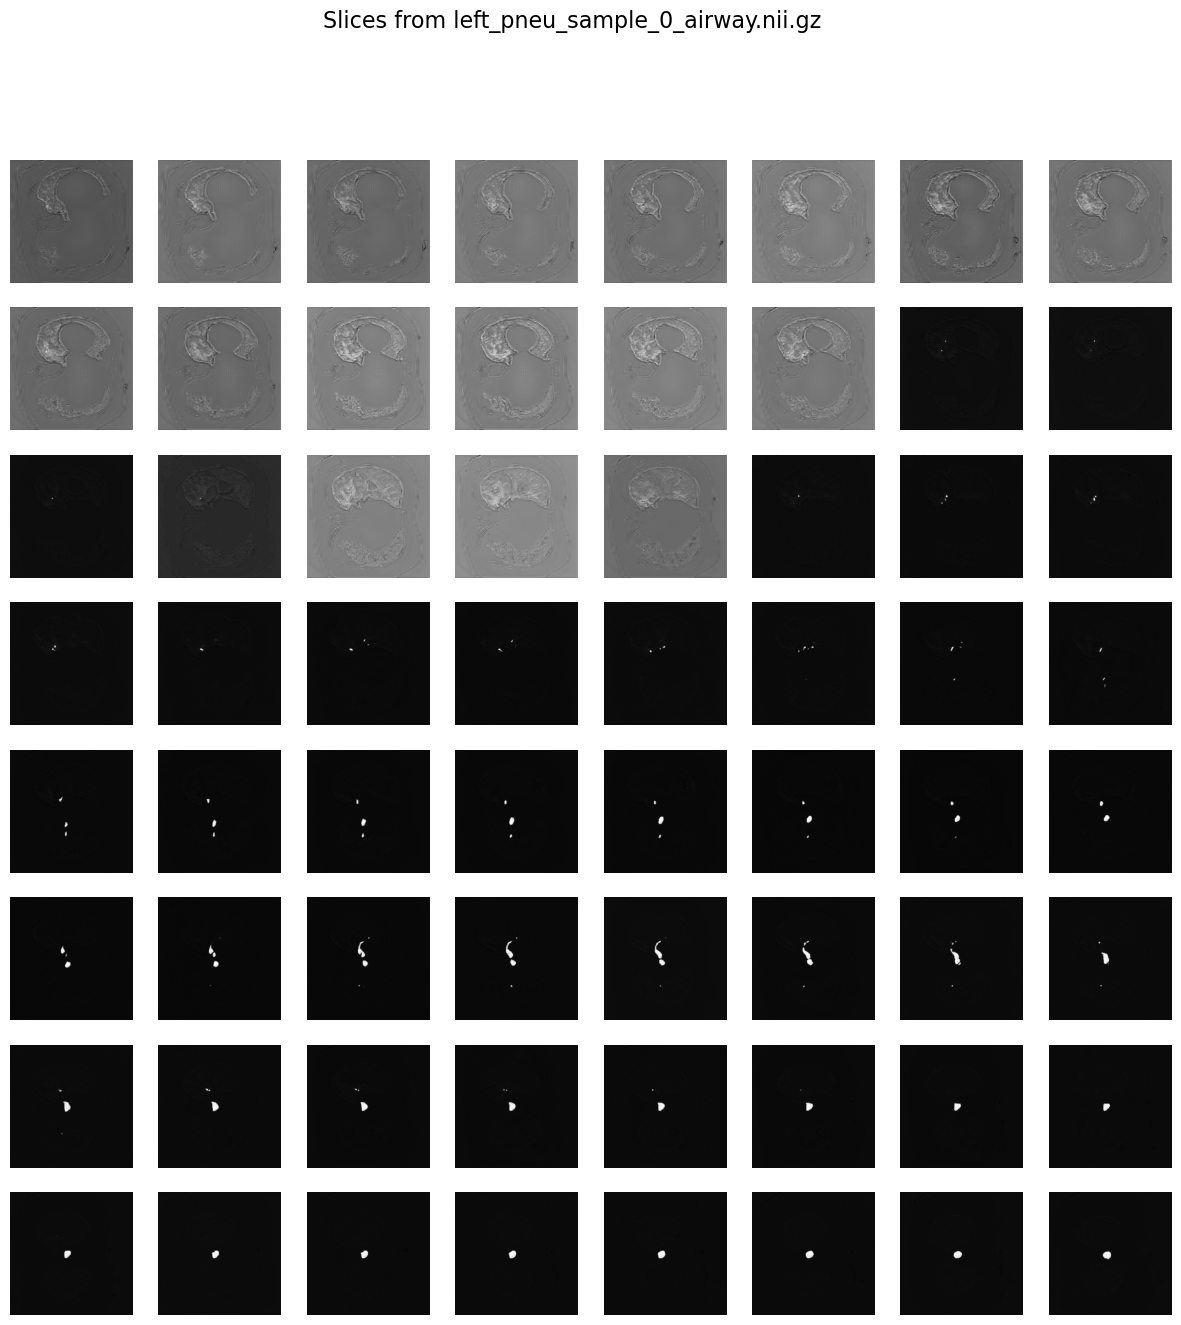

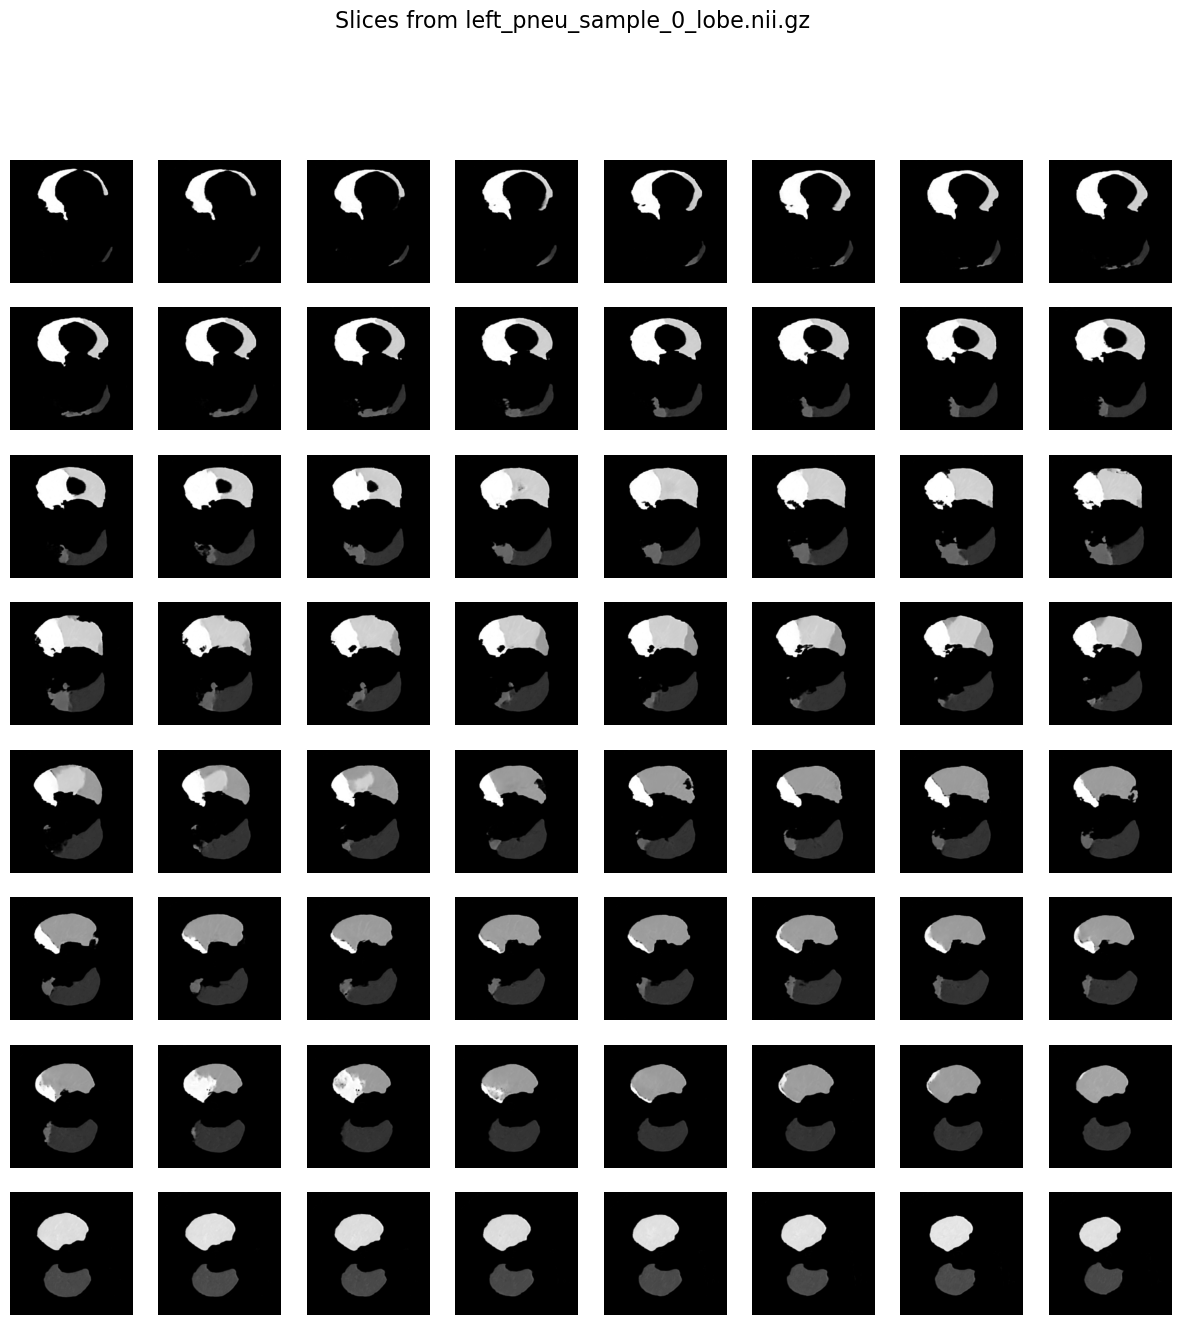

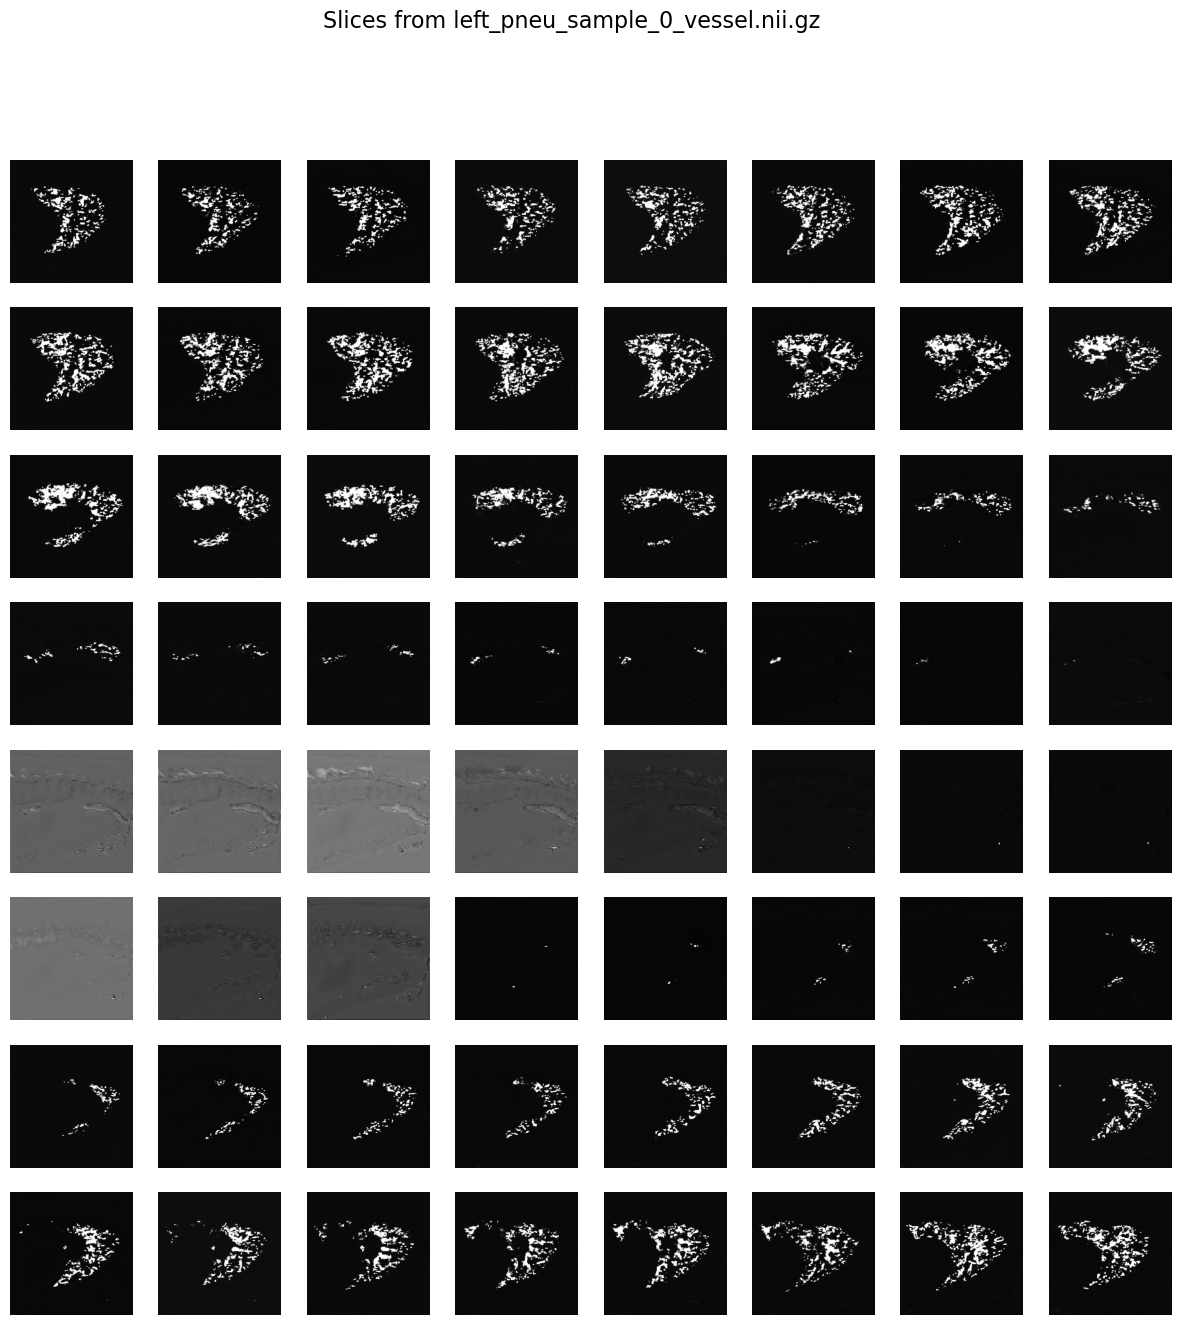

In [7]:
#Viewer for 256 images
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Paths to your NIfTI files
files = [
    '/jet/home/abradsha/MEDSYN/results/img_256_standard_bulk/left_pneu_sample_0.nii.gz',
    '/jet/home/abradsha/MEDSYN/results/img_256_standard_bulk/left_pneu_sample_0_airway.nii.gz',
    '/jet/home/abradsha/MEDSYN/results/img_256_standard_bulk/left_pneu_sample_0_lobe.nii.gz',
    '/jet/home/abradsha/MEDSYN/results/img_256_standard_bulk/left_pneu_sample_0_vessel.nii.gz'
]

# Loop through each file to visualize it in an 8x8 grid
for file in files:
    # Load the NIfTI file
    img = nib.load(file)
    data = img.get_fdata()
    
    # Remove the singleton dimension if it exists
    data = np.squeeze(data)
    
    # Calculate the middle 256 slices (assuming the z-axis is the 3rd dimension)
    z_slices = np.linspace(data.shape[2] // 4, (3 * data.shape[2]) // 4, 64, dtype=int)  # Select 64 slices from the middle
    
    fig, axes = plt.subplots(8, 8, figsize=(15, 15))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[:, :, z_slices[i]], cmap='gray')
        ax.axis('off')  # Turn off axis labels
    
    fig.suptitle(f'Slices from {file.split("/")[-1]}', fontsize=16)
    plt.show()



In [ ]:
import numpy as np
import pyvista as pv
from scipy.ndimage import zoom

# Load the 3D image data (shape: (1, 4, 64, 64, 64))
data = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy')

# Extract the first sample and first segmentation channel
volume = data[0, 0, :, :, :]  # Shape: (64, 64, 64)

# Downsample the volume to reduce memory usage
volume_downsampled = zoom(volume, (0.5, 0.5, 0.5))  # Adjust downsampling factor as needed

# Normalize the downsampled volume for better visualization
volume_downsampled = (volume_downsampled - volume_downsampled.min()) / (volume_downsampled.max() - volume_downsampled.min())

# Create a PyVista plotter
plotter = pv.Plotter()

# Add the volumetric data to the plotter
plotter.add_volume(
    pv.wrap(volume_downsampled),
    cmap="gray",
    opacity="linear",
    opacity_unit_distance=0.1
)

plotter.add_axes()
plotter.add_title("3D Volumetric Visualization (Downsampled)")

# Display the plot
plotter.show(jupyter_backend="pythreejs")


/jet/home/abradsha/.conda/envs/medsyn3.9++/lib/python3.8/site-packages/pyvista/core/utilities/points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
/jet/home/abradsha/.conda/envs/medsyn3.9++/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


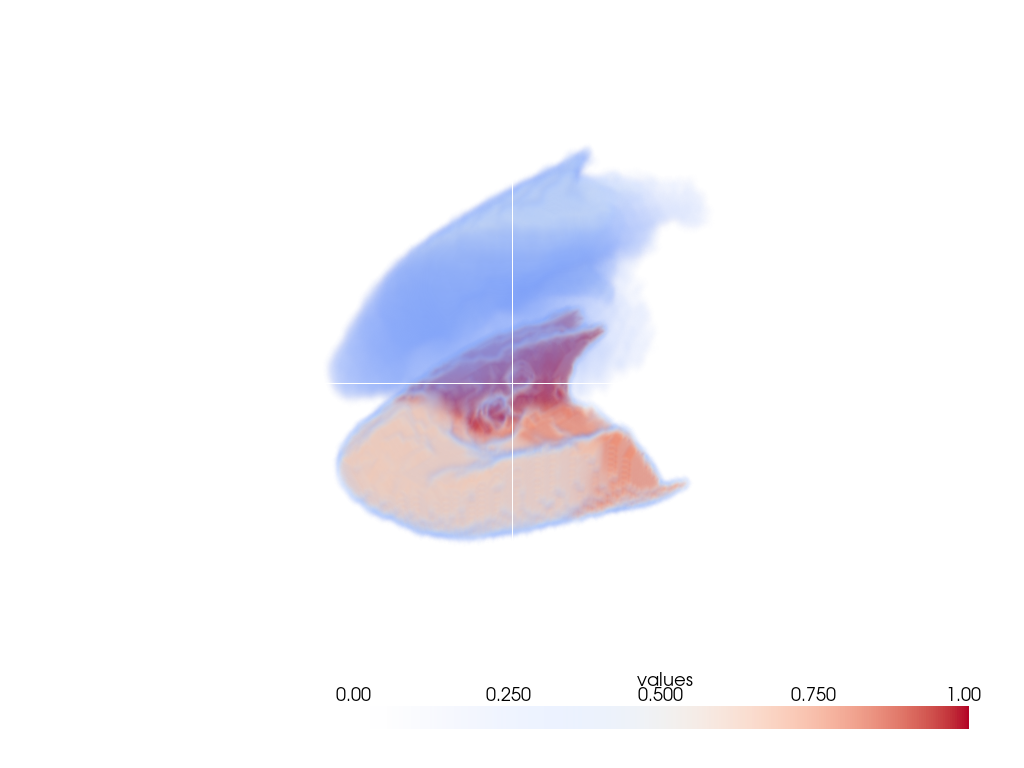

Enhanced 3D volume visualization saved as /jet/home/abradsha/MEDSYN/results/3D_volume_visualization_enhanced.png


In [3]:
import numpy as np
import pyvista as pv
from pyvista import start_xvfb  # Start virtual framebuffer for headless environments

# Start virtual frame buffer
start_xvfb()

# Load the data
data = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy')
volume = data[0, 1, :, :, :]  # Extract the first sample and first channel, shape: (64, 64, 64)

# Normalize the data and convert to float32 for better rendering
volume = (volume - volume.min()) / (volume.max() - volume.min())
volume = volume.astype(np.float32)

# Create the coordinate grid for the StructuredGrid
x = np.arange(volume.shape[0])
y = np.arange(volume.shape[1])
z = np.arange(volume.shape[2])
x, y, z = np.meshgrid(x, y, z, indexing="ij")

# Create PyVista StructuredGrid
grid = pv.StructuredGrid(x, y, z)
grid["values"] = volume.flatten(order="F")

# Set up the PyVista plotter
plotter = pv.Plotter(off_screen=True)  # Use off-screen rendering

# Define an opacity transfer function that emphasizes mid-range structures
opacity = [0, 0.1, 0.3, 0.5, 0.7, 1.0]  # Adjusted for more contrast in the mid-range

# Add the volume with adjusted opacity and color map
plotter.add_volume(grid, cmap="coolwarm", opacity=opacity, shade=True)

# Save the visualization
output_path = "/jet/home/abradsha/MEDSYN/results/3D_volume_visualization_enhanced.png"
plotter.show(screenshot=output_path)

print(f"Enhanced 3D volume visualization saved as {output_path}")


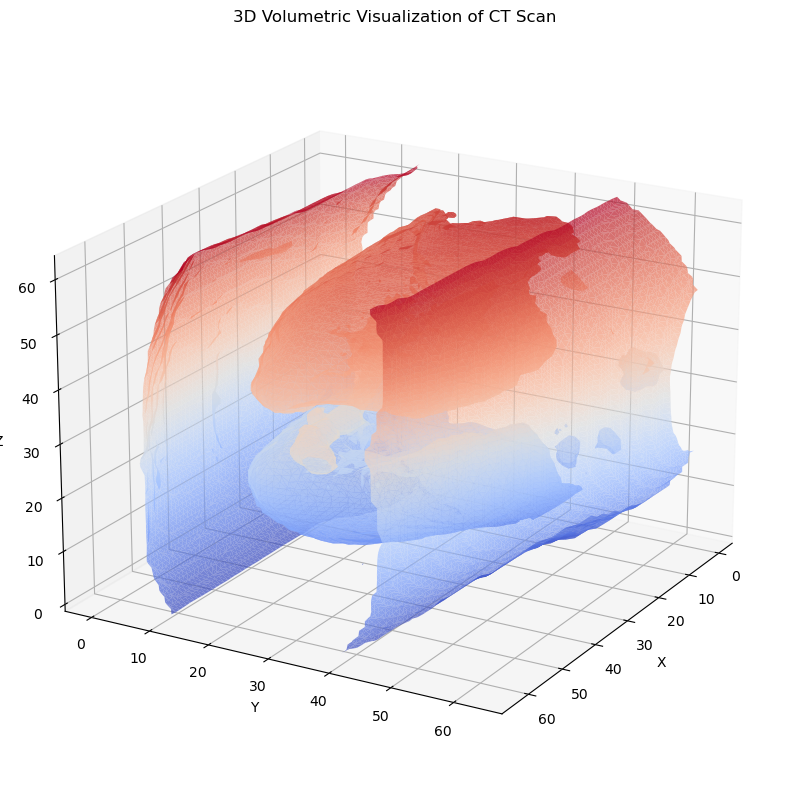

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure

# Load the data
data = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy')
volume = data[0, 0, :, :, :]  # Extract the first sample and first channel, shape: (64, 64, 64)

# Normalize the data for better visualization
volume = (volume - volume.min()) / (volume.max() - volume.min())

# Define a threshold for the isosurface
threshold = 0.5  # Adjust threshold to see more or less detail

# Generate an isosurface
verts, faces, normals, values = measure.marching_cubes(volume, level=threshold)

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
mesh = ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2],
                       cmap='coolwarm', lw=1, alpha=0.7)

# Customize the view angle
ax.view_init(elev=20, azim=30)  # Adjust for better angle

# Set axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("3D Volumetric Visualization of CT Scan")

# Show plot
plt.show()


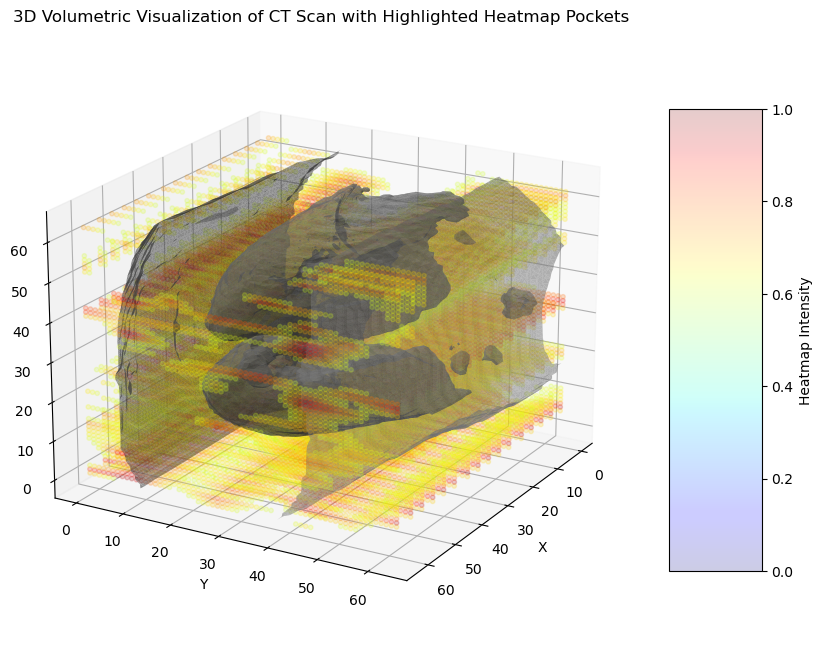

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure
from scipy.ndimage import zoom, label

# Load the data and heatmaps
data = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy')
heatmaps = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy_heatmaps.npy')

# Extract the first sample and first channel from the data
volume = data[0, 0, :, :, :]  # Shape: (64, 64, 64)

# Normalize the volume data
volume = (volume - volume.min()) / (volume.max() - volume.min())

# Process the heatmap to match the CT scan dimensions
t = heatmaps.shape[0] - 1
heatmap_t = heatmaps[t].reshape(1, 64, 8, 64, 32)
heatmap_avg = np.mean(heatmap_t[0], axis=(0, 2))  # Average over heads and tokens, shape: (64, 64)

# Upsample the heatmap to match the volume's spatial dimensions
resized_heatmap = zoom(heatmap_avg, (volume.shape[1] / heatmap_avg.shape[0], volume.shape[2] / heatmap_avg.shape[1]), order=1)

# Selectively distribute heatmap along z-axis to avoid continuous beams
resized_heatmap_3d = np.zeros(volume.shape)
z_slices = np.linspace(0, volume.shape[0]-1, num=16, dtype=int)  # Sample 16 slices along z-axis
for z in z_slices:
    resized_heatmap_3d[z] = resized_heatmap

# Normalize the 3D heatmap
resized_heatmap_3d -= resized_heatmap_3d.min()
if resized_heatmap_3d.max() != 0:
    resized_heatmap_3d /= resized_heatmap_3d.max()

# Apply a higher threshold and find connected clusters
heatmap_threshold = 0.6  # Adjust this to control the highlighted regions
binary_heatmap = resized_heatmap_3d > heatmap_threshold

# Label connected high-intensity regions
labeled_clusters, num_features = label(binary_heatmap)

# Filter out small clusters to retain meaningful pockets
min_cluster_size = 0  # Minimum size for clusters
filtered_clusters = [np.argwhere(labeled_clusters == i + 1) for i in range(num_features)
                     if np.sum(labeled_clusters == i + 1) >= min_cluster_size]

# Generate isosurface for the grayscale volume
verts, faces, normals, values = measure.marching_cubes(volume, level=0.5)

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the grayscale anatomical structure
mesh = ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2],
                       color='gray', lw=1, alpha=0.55)

scatter = None
# Plot each detected cluster as a distinct pocket with color
for cluster_points in filtered_clusters:
    intensities = resized_heatmap_3d[tuple(cluster_points.T)]
    # Use normalized colors to map the intensity values
    scatter = ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
                         c=intensities, cmap='jet', alpha=0.2, s=10, marker='o', vmin=0, vmax=1)

# Adding a color bar for reference
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=5)
cbar.set_label("Heatmap Intensity")

# Customize the view angle
ax.view_init(elev=20, azim=30)

# Set axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("3D Volumetric Visualization of CT Scan with Highlighted Heatmap Pockets")

# Show plot
plt.show()


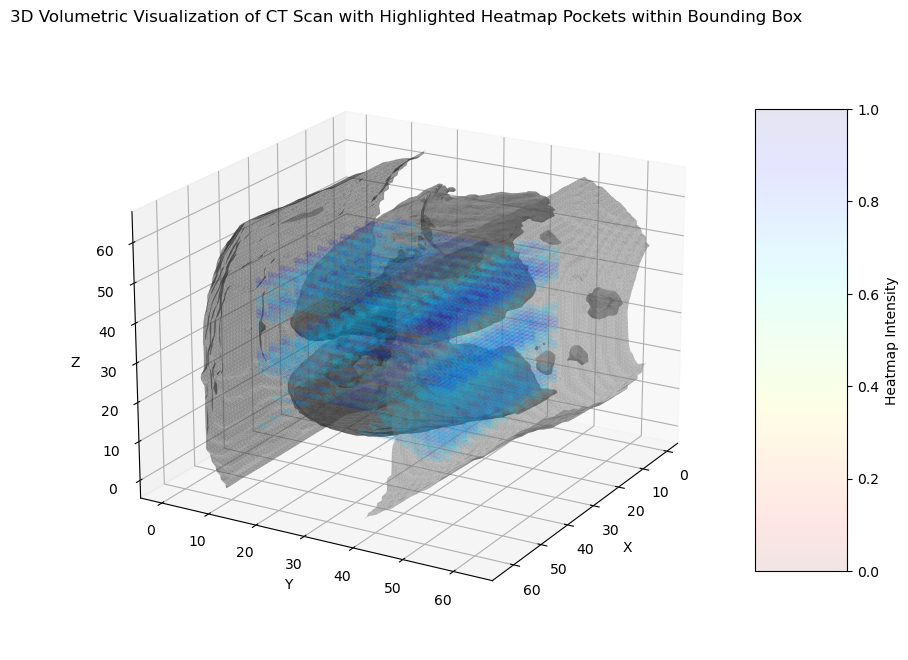

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure
from scipy.ndimage import zoom, label

# Load the data and heatmaps
data = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy')
heatmaps = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy_heatmaps.npy')

# Extract the first sample and first channel from the data
volume = data[0, 0, :, :, :]  # Shape: (64, 64, 64)

# Normalize the volume data
volume = (volume - volume.min()) / (volume.max() - volume.min())

# Process the heatmap to match the CT scan dimensions
t = heatmaps.shape[0] - 1
heatmap_t = heatmaps[t].reshape(1, 64, 8, 64, 32)
heatmap_avg = np.mean(heatmap_t[0], axis=(0, 2))  # Average over heads and tokens, shape: (64, 64)

# Upsample the heatmap to match the volume's spatial dimensions
resized_heatmap = zoom(heatmap_avg, (volume.shape[1] / heatmap_avg.shape[0], volume.shape[2] / heatmap_avg.shape[1]), order=1)

# Selectively distribute heatmap along z-axis to avoid continuous beams
resized_heatmap_3d = np.zeros(volume.shape)
z_slices = np.linspace(0, volume.shape[0]-1, num=16, dtype=int)  # Sample 16 slices along z-axis
for z in z_slices:
    resized_heatmap_3d[z] = resized_heatmap

# Normalize the 3D heatmap
resized_heatmap_3d -= resized_heatmap_3d.min()
if resized_heatmap_3d.max() != 0:
    resized_heatmap_3d /= resized_heatmap_3d.max()

# Apply a higher threshold and find connected clusters
heatmap_threshold = 0.65  # Adjust this to control the highlighted regions
binary_heatmap = resized_heatmap_3d > heatmap_threshold

# Label connected high-intensity regions
labeled_clusters, num_features = label(binary_heatmap)

# Define bounding box limits
x_min, x_max = 10, 50
y_min, y_max = 10, 50
z_min, z_max = 10, 50

# Filter clusters to retain only points within the bounding box
min_cluster_size = 0  # Minimum size for clusters
filtered_clusters = []
for i in range(num_features):
    cluster_points = np.argwhere(labeled_clusters == i + 1)
    # Apply bounding box conditions
    within_bounds = (
        (cluster_points[:, 0] >= x_min) & (cluster_points[:, 0] <= x_max) &
        (cluster_points[:, 1] >= y_min) & (cluster_points[:, 1] <= y_max) &
        (cluster_points[:, 2] >= z_min) & (cluster_points[:, 2] <= z_max)
    )
    cluster_points = cluster_points[within_bounds]
    # Keep clusters that meet the bounding box constraint
    if len(cluster_points) >= min_cluster_size:
        filtered_clusters.append(cluster_points)

# Generate isosurface for the grayscale volume
verts, faces, normals, values = measure.marching_cubes(volume, level=0.5)

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the grayscale anatomical structure
mesh = ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2],
                       color='gray', lw=1, alpha=0.55)

scatter = None
# Plot each detected cluster as a distinct pocket with color within the bounding box
for cluster_points in filtered_clusters:
    intensities = resized_heatmap_3d[tuple(cluster_points.T)]
    # Use normalized colors to map the intensity values
    scatter = ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
                         c=intensities, cmap='jet', alpha=0.1, s=10, marker='o', vmin=0, vmax=1)

# Adding a color bar for reference
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=5)
cbar.set_label("Heatmap Intensity")

# Customize the view angle
ax.view_init(elev=20, azim=30)

# Set axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("3D Volumetric Visualization of CT Scan with Highlighted Heatmap Pockets within Bounding Box")

# Show plot
plt.show()


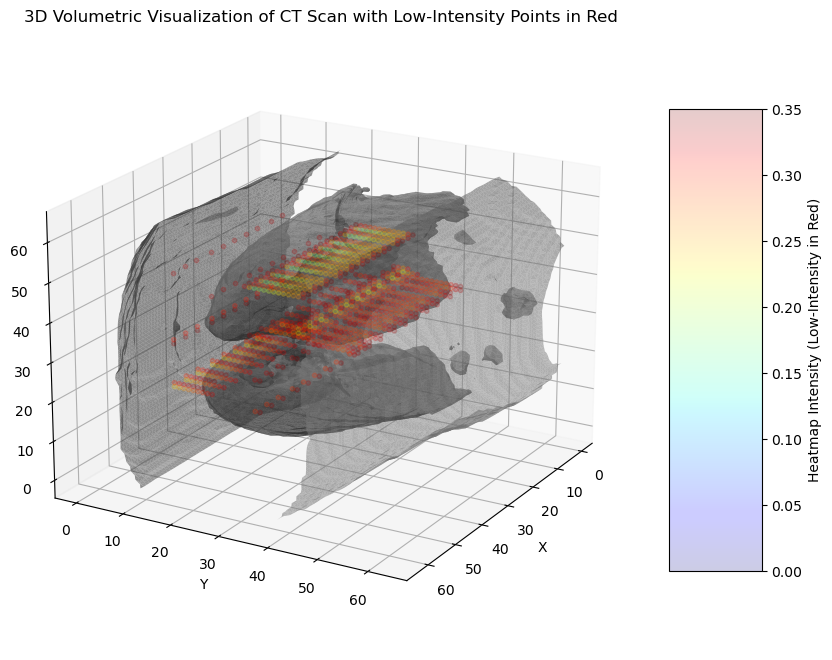

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure
from scipy.ndimage import zoom, label

# Load the data and heatmaps
data = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy')
heatmaps = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy_heatmaps.npy')

# Extract the first sample and first channel from the data
volume = data[0, 0, :, :, :]  # Shape: (64, 64, 64)

# Normalize the volume data
volume = (volume - volume.min()) / (volume.max() - volume.min())

# Process the heatmap to match the CT scan dimensions
t = heatmaps.shape[0] - 1
heatmap_t = heatmaps[t].reshape(1, 64, 8, 64, 32)
heatmap_avg = np.mean(heatmap_t[0], axis=(0, 2))  # Average over heads and tokens, shape: (64, 64)

# Upsample the heatmap to match the volume's spatial dimensions
resized_heatmap = zoom(heatmap_avg, (volume.shape[1] / heatmap_avg.shape[0], volume.shape[2] / heatmap_avg.shape[1]), order=1)

# Selectively distribute heatmap along z-axis to avoid continuous beams
resized_heatmap_3d = np.zeros(volume.shape)
z_slices = np.linspace(0, volume.shape[0]-1, num=16, dtype=int)  # Sample 16 slices along z-axis
for z in z_slices:
    resized_heatmap_3d[z] = resized_heatmap

# Normalize the 3D heatmap
resized_heatmap_3d -= resized_heatmap_3d.min()
if resized_heatmap_3d.max() != 0:
    resized_heatmap_3d /= resized_heatmap_3d.max()

# Set an upper threshold to display only low-intensity points
upper_intensity_bound = 0.35  # Adjust this to display more or fewer low-intensity regions
binary_heatmap = resized_heatmap_3d < upper_intensity_bound  # Invert the condition to focus on low values

# Label connected low-intensity regions
labeled_clusters, num_features = label(binary_heatmap)

# Define bounding box limits
x_min, x_max = 10, 50
y_min, y_max = 10, 50
z_min, z_max = 10, 50

# Filter clusters to retain only points within the bounding box
min_cluster_size = 0  # Minimum size for clusters
filtered_clusters = []
for i in range(num_features):
    cluster_points = np.argwhere(labeled_clusters == i + 1)
    # Apply bounding box conditions
    within_bounds = (
        (cluster_points[:, 0] >= x_min) & (cluster_points[:, 0] <= x_max) &
        (cluster_points[:, 1] >= y_min) & (cluster_points[:, 1] <= y_max) &
        (cluster_points[:, 2] >= z_min) & (cluster_points[:, 2] <= z_max)
    )
    cluster_points = cluster_points[within_bounds]
    # Keep clusters that meet the bounding box constraint
    if len(cluster_points) >= min_cluster_size:
        filtered_clusters.append(cluster_points)

# Generate isosurface for the grayscale volume
verts, faces, normals, values = measure.marching_cubes(volume, level=0.5)

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the grayscale anatomical structures
mesh = ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2],
                       color='gray', lw=1, alpha=0.55)

scatter = None
# Plot each detected cluster as a distinct pocket with color within the bounding box
for cluster_points in filtered_clusters:
    intensities = resized_heatmap_3d[tuple(cluster_points.T)]
    # Use 'jet_r' colormap to display low values as red
    scatter = ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
                         c=intensities, cmap='jet', alpha=0.2, s=10, marker='o', vmin=0, vmax=upper_intensity_bound)

# Adding a color bar for reference
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=5)
cbar.set_label("Heatmap Intensity (Low-Intensity in Red)")

# Customize the view angle
ax.view_init(elev=20, azim=30)

# Set axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("3D Volumetric Visualization of CT Scan with Low-Intensity Points in Red")

# Show plot
plt.show()
